## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [42]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

##
##

# 分類型決策樹

In [43]:
dataset = datasets.load_wine()

# 切割資料(訓練集、測試集)
train_X, test_X, train_Y, test_Y = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=6)

# 設定決策樹(分類問題)
dtree = DecisionTreeClassifier(criterion='entropy')     # 採用'entropy'資料量判斷

# 訓練模型
dtree.fit(train_X, train_Y)

# 預測[測試資料]
pred_Y = dtree.predict(test_X)

In [44]:
# 印出準確率(Accuracy) 和每個feature 的重要程度(entropy 訊息增益分數)
print("Accuracy : ", metrics.accuracy_score(test_Y , pred_Y))  

imp = pd.DataFrame({'feature':dataset.feature_names, 'importance':dtree.feature_importances_})
imp

Accuracy :  1.0


,feature,importance
0,alcohol,0.028099
1,malic_acid,0.000000
2,ash,0.027863
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.433350
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.199372


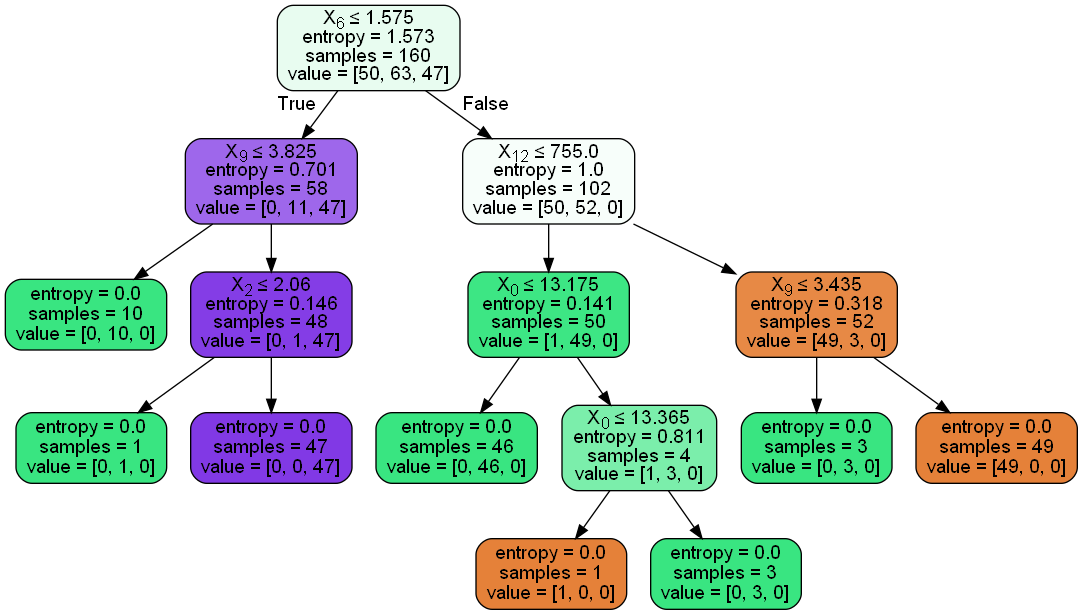

In [45]:
# 印出決策樹

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
###########
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'     # 添加 Graphviz 的檔案到路徑中

dot_data = StringIO()
export_graphviz(dtree , out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# 決策樹中顯示的 'entrophy' 或 'Gini' 是指[資料量標準]，也就是分類邊界


##
##

# 回歸型決策樹

In [46]:
# 資料設置
dataset = datasets.fetch_california_housing()

# 資料分割
train_X,test_X,train_Y,test_Y = train_test_split(dataset.data , dataset.target , test_size=0.1, random_state=6)

# 設置決策樹(回歸樹)
dtree = DecisionTreeRegressor(criterion='mse')

# 訓練模型
dtree.fit(train_X , train_Y)

# 預測資料
pred_Y = dtree.predict(test_X)

In [47]:
# 印出 MSE、feature 的 Gini 訊息增益
print('MSE : ', metrics.mean_squared_error(test_Y, pred_Y))
print(dataset.data.shape)

MSE :  0.528560477265327
(20640, 8)


## 更改 決策樹(回歸樹) min_samples_leaf 參數 (最終的葉子上最少要有幾個 sample樣本)
## 並比較其MSE分數變化(越小模型越準確)

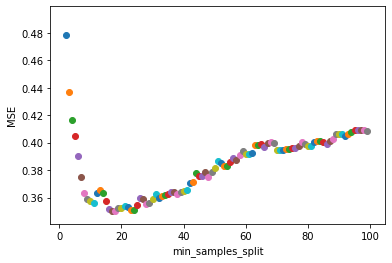

In [48]:
import matplotlib.pyplot as plt

for i in range(2,100):                                                  # 參數= [1,100)
    dtree = DecisionTreeRegressor(criterion='mse',min_samples_leaf=i)
    dtree.fit(train_X,train_Y)
    pred_Y = dtree.predict(test_X)
    score = metrics.mean_squared_error(test_Y,pred_Y)
    plt.scatter(i, score)

plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.show()